In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

components
 [[-0.3916421  -0.92011764]
 [ 0.92011764 -0.3916421 ]]
mean
 [1.33226763e-17 3.01980663e-16]
covariance
 [[1.0667892  1.30518951]
 [1.30518951 3.57763495]]
explained_variance_ratio
 [0.88992311 0.11007689]


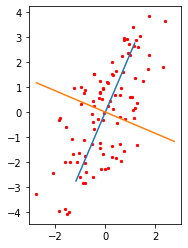

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import numpy as np

N=100

x = np.random.randn(N)
y = 3*x/3 + np.random.rand(N)*5

x_ave, y_ave = np.average(x), np.average(y)
x_std, y_std = np.std(x), np.std(y)
x_st, y_st = (x-x_ave)/x_std, (y-y_ave)/y_std
x_st, y_st = (x-x_ave), (y-y_ave)

plt.axes().set_aspect('equal')
plt.scatter(x_st, y_st, s=5, c='r')
#plt.show()
#plt.scatter(x, y, s=5, c='r')

# sklearn で正解を確認
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(np.array([x_st, y_st]).T)
print('components\n', pca.components_)
print('mean\n', pca.mean_)
print('covariance\n', pca.get_covariance())
print('explained_variance_ratio\n', pca.explained_variance_ratio_)
for c in pca.components_:
    ax, ay = c[0], c[1]
    plt.plot([3*ax, -3*ax], [3*ay, -3*ay])
plt.show()

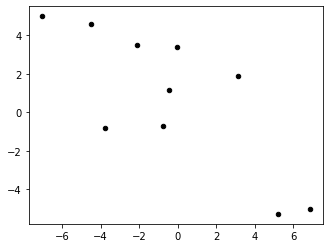

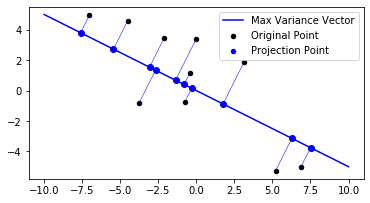

In [92]:
N = 10
TH = - np.pi / 6
#x = [1, 2, 3, 4, 5]
#y = [4, 3.5, 3, 2.5, 2]
x = np.random.rand(N) * 20 - 10
y = np.random.randn(N) * 2
x, y = x*np.cos(TH)-y*np.sin(TH), x*np.sin(TH)+y*np.cos(TH)

plt.axes().set_aspect('equal')
plt.scatter(x, y, s=20, c='black')
plt.show()

plt.axes().set_aspect('equal')
plt.scatter(x, y, s=20, c='black', label='Original Point')
plt.scatter([], [], s=20, c='b', label='Projection Point')
plt.plot([-10, 10], [5, -5], c='b', label='Max Variance Vector')
#plt.plot([-2, 2], [-4, 4], c='r')
for x_, y_ in zip(x, y):
    x2 = (4*x_-2*y_)/5
    y2 = (y_-2*x_)/5
    plt.plot([x_, x2], [y_, y2], c='b', linewidth=0.5)
    plt.scatter([x2], [y2], c='b')
plt.legend()
plt.show()

In [118]:
class PCA:
    def __init__(self):
        return
    
    def fit(self, data):
        cov = np.cov(data, rowvar=0, bias=1)
        lam, vec = np.linalg.eig(cov)
        indices = np.argsort(-lam)
        self.contribution = lam[indices] / np.sum(lam)
        self.components = vec[indices]
        
    def transform(self, data, d):
        """
        Parameters
        ----------
        data : 圧縮したいデータ
        d : 何次元まで圧縮するか
        """
        result = []
        for comp in self.components[:d]:
            result.append(np.dot(data, comp))
        result = np.array(result).T
        return result

[0.72770452 0.23030523 0.03683832 0.00515193]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


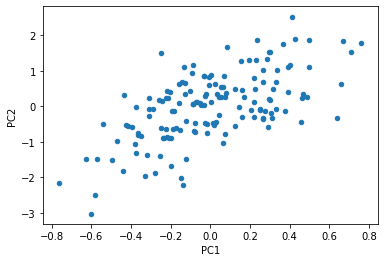

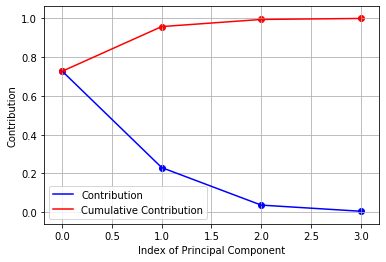

In [62]:
# アイリスデータセットの読み込み
import urllib
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = []
with urllib.request.urlopen(url) as f:
    for line in [l.decode('utf-8').strip() for l in f.readlines()]:
        if len(line) == 0:
            continue
        x1, x2, x3, x4, label = line.split(',')
        iris.append([float(x1), float(x2), float(x3), float(x4)])
np.random.shuffle(iris)

iris = (iris - np.average(iris, axis=0)) / np.std(iris, axis=0)

# 4次元データを2次元に圧縮
pca = PCA()
pca.fit(iris)
data_new = pca.transform(iris, 2)
print(pca.contribution)
# [0.72770452 0.23030523 0.03683832 0.00515193]
print(pca.components)
"""
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
"""

# 変換後の値の描画
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(data_new[:, 0], data_new[:, 1], s=20)
plt.show()

# 各主成分ごとの寄与率 / 累積寄与率を描画
cumulative_cont = [pca.contribution[0]]
for c in pca.contribution[1:]:
    cumulative_cont.append(cumulative_cont[-1]+c)
plt.xlabel('Index of Principal Component')
plt.ylabel('Contribution')
plt.scatter(range(len(pca.contribution)), pca.contribution, c='b')
plt.plot(range(len(pca.contribution)), pca.contribution, c='b', label='Contribution')
plt.scatter(range(len(pca.contribution)), cumulative_cont, c='r')
plt.plot(range(len(pca.contribution)), cumulative_cont, c='r', label='Cumulative Contribution')
plt.grid()
plt.legend()
plt.show()

# カーネル PCA

### 標準化による共分散行列の書き換え

$$m$$ 次元データサンプル

$$
\boldsymbol{x} =
\begin{pmatrix}
x_1 \\
\vdots \\
x_m
\end{pmatrix}
$$

を事前に標準化しておけば、各特徴量の平均がゼロになるので、共分散行列は、

$$
C = \cfrac{1}{n-1} \begin{pmatrix}
\displaystyle \sum_{i=1}^n x_1^{(i)} x_1^{(i)} & \cdots & \displaystyle \sum_{i=1}^n x_1^{(i)} x_m^{(i)} \\
\vdots &  & \vdots \\
\displaystyle \sum_{i=1}^n x_m^{(i)} x_1^{(i)} & \cdots & \displaystyle \sum_{i=1}^n x_m^{(i)} x_m^{(i)}
\end{pmatrix}
= \cfrac{1}{n-1} \sum_{i=1}^n \boldsymbol{x} \boldsymbol{x}^T
$$

と書ける。$$n$$ 個の全データサンプル $$\boldsymbol{x}^{(1)}, \cdots, \boldsymbol{x}^{(n)}$$ を並べた $$m \times n$$ 行列

$$
D \equiv \left( \boldsymbol{x}^{(1)}, \cdots, \boldsymbol{x}^{(n)} \right)
= \begin{pmatrix}
x_1^{(1)} & \cdots & x_1^{(n)} \\
\vdots &  & \vdots \\
x_m^{(1)} & \cdots & x_m^{(n)}
\end{pmatrix}
$$

を使えば、

$$
C = \cfrac{1}{n-1} DD^T
$$

となる。

### 高次元空間への射影による共分散行列の置き換え

関数 $$\boldsymbol{\phi} = (\phi_1, \cdots, \phi_M)$$ を用いて $$\boldsymbol{x}$$ を $$M\ (\gg m)$$ 次元空間に射影する：

$$
\boldsymbol{x} =
\begin{pmatrix}
x_1 \\
\vdots \\
x_m
\end{pmatrix}
\longmapsto
\boldsymbol{\phi} (\boldsymbol{x}) =
\begin{pmatrix}
\phi_1(\boldsymbol{x}) \\
\vdots \\
\phi_M(\boldsymbol{x})
\end{pmatrix}
$$

**高次元空間への射影を実際に計算して求めるのは計算コストが非常に大きい。**  
**そのため、射影後のベクトルの「内積」だけを使って以後の全ての計算を行う（カーネルトリック。詳細はサポートベクトルマシンのノートを参照）**

射影後の空間における共分散行列 $$C_{\phi}$$ は以下の式で書ける。

$$
C_{\phi} \equiv \cfrac{1}{n-1} \begin{pmatrix}
\displaystyle \sum_{i=1}^n \phi_1 \left(\boldsymbol{x}^{(i)}\right) \phi_1 \left(\boldsymbol{x}^{(i)}\right) & \cdots &
\displaystyle \sum_{i=1}^n \phi_1 \left(\boldsymbol{x}^{(i)}\right) \phi_M \left(\boldsymbol{x}^{(i)}\right) \\
\vdots &  & \vdots \\
\displaystyle \sum_{i=1}^n \phi_M \left(\boldsymbol{x}^{(i)}\right) \phi_1 \left(\boldsymbol{x}^{(i)}\right) & \cdots &
\displaystyle \sum_{i=1}^n \phi_M \left(\boldsymbol{x}^{(i)}\right) \phi_M \left(\boldsymbol{x}^{(i)}\right)
\end{pmatrix}
= \cfrac{1}{n-1} D_{\phi} D_{\phi}^T
$$

**但し、射影後の空間でもデータサンプルの平均がゼロになるよう標準化されていることを仮定（後述）**。

$$
D_{\phi} \equiv \begin{pmatrix}
\phi_1 \left(\boldsymbol{x}^{(1)} \right) & \cdots & \phi_1 \left(\boldsymbol{x}^{(n)} \right) \\
\vdots &  & \vdots \\
\phi_M \left(\boldsymbol{x}^{(1)} \right) & \cdots & \phi_M \left(\boldsymbol{x}^{(n)} \right)
\end{pmatrix}
$$

### カーネル行列の定義

高次元空間における内積を定義するカーネル関数

$$
k\left(\boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)}\right)
\equiv \boldsymbol{\phi} \left(\boldsymbol{x}^{(i)}\right) \cdot \boldsymbol{\phi} \left(\boldsymbol{x}^{(j)}\right)
$$

を決め、カーネル行列

$$
\begin{eqnarray}
K &\equiv& \begin{pmatrix}
k\left(\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(1)}\right)
& \cdots &
k\left(\boldsymbol{x}^{(1)}, \boldsymbol{x}^{(n)}\right)
\\
\vdots &  & \vdots \\
k\left(\boldsymbol{x}^{(n)}, \boldsymbol{x}^{(1)}\right)
& \cdots &
k\left(\boldsymbol{x}^{(n)}, \boldsymbol{x}^{(n)}\right)
\end{pmatrix} \\
&=& \begin{pmatrix}
\displaystyle \sum_{j=1}^M \phi_j \left(\boldsymbol{x}^{(1)}\right) \phi_j \left(\boldsymbol{x}^{(1)}\right)
& \cdots &
\displaystyle \sum_{j=1}^M \phi_j \left(\boldsymbol{x}^{(1)}\right) \phi_j \left(\boldsymbol{x}^{(n)}\right)
\\
\vdots &  & \vdots \\
\displaystyle \sum_{j=1}^M \phi_j \left(\boldsymbol{x}^{(n)}\right) \phi_j \left(\boldsymbol{x}^{(1)}\right)
& \cdots &
\displaystyle \sum_{j=1}^M \phi_j \left(\boldsymbol{x}^{(n)}\right) \phi_j \left(\boldsymbol{x}^{(n)}\right)
\end{pmatrix} \\
&=& D_{\phi}^T D_{\phi}
\end{eqnarray}
$$

を計算しておく。  
カーネル関数の決め方についてはサポートベクトルマシンのノートを参照。

$$K = D_{\phi}^T D_{\phi}$$ より

$$
K^T = (D_{\phi}^T D_{\phi})^T = D_{\phi}^T (D_{\phi}^T)^T = D_{\phi}^T D_{\phi} = K
$$

なので、$$K$$ は対称行列。


### 固有方程式

$$M$$ 次元空間における共分散行列の固有方程式は、

$$
C_{\phi} \boldsymbol{a}_{\phi} = \lambda \boldsymbol{a}_{\phi}
$$

$$C_{\phi} = \cfrac{1}{n-1} D_{\phi} D_{\phi}^T$$ を代入すれば、

$$
\cfrac{1}{n-1} D_{\phi} D_{\phi}^T \boldsymbol{a}_{\phi} = \lambda \boldsymbol{a}_{\phi}
$$

を得る。

左から $$(n-1) D^T$$ をかけると、

$$
K D_{\phi}^T \boldsymbol{a}_{\phi} = (n-1) \lambda D_{\phi}^T \boldsymbol{a}_{\phi}
$$

ここで

$$
\boldsymbol{\nu} \equiv \cfrac{1}{(n-1) \lambda} D_{\phi}^T \boldsymbol{a}_{\phi}
$$

とおけば（係数 $$\cfrac{1}{(n-1) \lambda}$$ は後の計算を楽にするためにつけている）、

$$
K \boldsymbol{\nu} = (n-1) \lambda \boldsymbol{\nu}
$$

これは $$K$$ の固有方程式（固有値 $$(n-1) \lambda$$, 固有ベクトル $$\boldsymbol{\nu}$$）。

> **【NOTE】**
> 
> **内積の行列である $$K = D_{\phi}^T D_{\phi}$$ は計算してあるが $$D_{\phi}$$ の要素の値は計算しないので、$$\boldsymbol{\nu} = D_{\phi}^T \boldsymbol{a}_{\phi}$$ から $$\boldsymbol{a}_{\phi}$$ を求めることはできない。**


### 最適解の選択

$$K$$ の固有方程式を解き、$$n$$ 個数の固有値・固有ベクトルを求める。

線形 PCA の節で見た通り、共分散行列の固有値 $$\lambda$$ は主成分空間における分散に一致する。  
$$n-1$$ は定数なので、$$K$$ の固有値 $$(n-1) \lambda$$ が大きいほど分散 $$\lambda$$ も大きい。  
よって線形 PCA と同様に、特徴抽出後の分散を大きくするには固有値が大きいものから順に固有ベクトルを $$l$$ 個選べば良い。


### データサンプルの射影

選択した $$K$$ の固有ベクトル $$\boldsymbol{\nu}_j =　\cfrac{1}{(n-1) \lambda_j} D_{\phi}^T \boldsymbol{a}_{\phi, j}\ (j = 1, \cdots, l)$$ に対応する $$\boldsymbol{a}_{\phi, j}$$ により、未知のデータサンプル $$\boldsymbol{x}$$ を新しい特徴量 $$X_j$$ に射影する：

$$
X_j = \boldsymbol{\phi} \left( \boldsymbol{x} \right) \cdot \boldsymbol{a}_{\phi, j}
$$

ここで

$$
\boldsymbol{\nu}_j = \cfrac{1}{(n-1) \lambda_j} D_{\phi}^T \boldsymbol{a}_{\phi, j}
$$

に左から $$D_{\phi}$$ をかけると、$$C_{\phi} = \cfrac{1}{n-1} D_{\phi} D_{\phi}^T$$ より

$$
D_{\phi} \boldsymbol{\nu}_j = \cfrac{1}{\lambda_j} C_{\phi} \boldsymbol{a}_{\phi, j}
$$

$$\boldsymbol{a}_{\phi, j}$$ は $$C_{\phi}$$ の固有ベクトル（$$C_{\phi} \boldsymbol{a}_{\phi, j} = \lambda_j \boldsymbol{a}_{\phi, j}$$）であるから、

$$
D_{\phi} \boldsymbol{\nu}_j = \boldsymbol{a}_{\phi, j}
$$

よって

$$
\begin{eqnarray}
X_j
&=& \boldsymbol{\phi} \left( \boldsymbol{x} \right) \cdot \boldsymbol{a}_{\phi, j} \\
&=& \boldsymbol{\phi} \left( \boldsymbol{x} \right)^T D_{\phi} \boldsymbol{\nu}_j \\
&=& \left( \phi_1\left(\boldsymbol{x}\right), \cdots, \phi_M\left(\boldsymbol{x}\right)\right)
\begin{pmatrix}
\phi_1 \left(\boldsymbol{x}^{(1)} \right) & \cdots & \phi_1 \left(\boldsymbol{x}^{(n)} \right) \\
\vdots &  & \vdots \\
\phi_M \left(\boldsymbol{x}^{(1)} \right) & \cdots & \phi_M \left(\boldsymbol{x}^{(n)} \right)
\end{pmatrix}
\begin{pmatrix}
\nu_{j, 1} \\
\vdots \\
\nu_{j, n}
\end{pmatrix}
\\
&=& \left( \boldsymbol{\phi}\left(\boldsymbol{x}\right) \cdot \boldsymbol{\phi}\left(\boldsymbol{x}^{(1)}\right), \cdots, \boldsymbol{\phi}\left(\boldsymbol{x}\right) \cdot \boldsymbol{\phi}\left(\boldsymbol{x}^{(n)}\right) \right)
\begin{pmatrix}
\nu_{j, 1} \\
\vdots \\
\nu_{j, n}
\end{pmatrix}
\\
&=& \left( k\left(\boldsymbol{x}, \boldsymbol{x}^{(1)}\right), \cdots, k\left(\boldsymbol{x}, \boldsymbol{x}^{(n)}\right) \right)
\begin{pmatrix}
\nu_{j, 1} \\
\vdots \\
\nu_{j, n}
\end{pmatrix}
\\
&=& \displaystyle \sum_{i=1}^n k\left(\boldsymbol{x}, \boldsymbol{x}^{(i)}\right) \nu_{j, i}
\end{eqnarray}
$$

カーネル関数 $$k$$ は計算可能であり、$$\nu_{j, i}$$ も計算済みであるから、この式により次元削減後の特徴量 $$X_j$$ を求めることができる。

$$
1_n \equiv \begin{pmatrix}
\frac{1}{n} & \cdots & \frac{1}{n} \\
\vdots &  & \vdots \\
\frac{1}{n} & \cdots & \frac{1}{n}
\end{pmatrix}
$$

In [41]:
import numpy as np

class KernelPCA:
    def __init__(self):
        return
    
    def fit(self, data):
        self.data = data
        n = len(data)
        K = np.zeros((n, n))
        for i in range(n):
            for j in range(i, n):
                k = self.__kernel_gaussian(data[i], data[j])
                K[i][j] = k
                K[j][i] = k
        K = self.__centralize_kernel(K)
        lam, vec = np.linalg.eig(K)
        indices = np.argsort(-lam)
        self.contribution = lam[indices] / np.sum(lam)
        self.components = vec[indices]

    def transform(self, data, d):
        """
        Parameters
        ----------
        data : 圧縮したいデータ
        d : 何次元まで圧縮するか
        """
        result = []
        for x in data:
            X = []
            for comp in self.components[:d]:
                tmp = 0
                for i in range(len(self.data)):
                    k = self.__kernel_gaussian(self.data[i], x)
                    tmp += k * comp[i]
                X.append(tmp)
            result.append(X)
        return np.array(result)
        
        result = []
        for comp in self.components[:d]:
            tmp = 0
            for i in range(len(self.data)):
                k = self.__kernel_gaussian(self.data[i], data[0])
                tmp += k * comp[i]
            result.append(tmp)
        result = np.array(result).T
        return result
    
    def __kernel_gaussian(self, x1, x2):
        """
        2つのデータサンプルのガウシアンカーネルを計算
        """
        return np.exp(- sum((x1-x2)**2) * 0.5)
    
    def __centralize_kernel(self, K):
        """
        カーネル行列 K を中心化する
        """
        n = len(K)
        tmp = np.full((n, n), 1.0/n)
        return K - np.dot(tmp, K) - np.dot(K, tmp) + np.dot(np.dot(tmp, K), tmp)

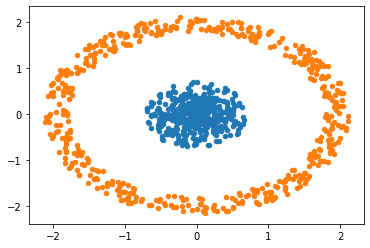

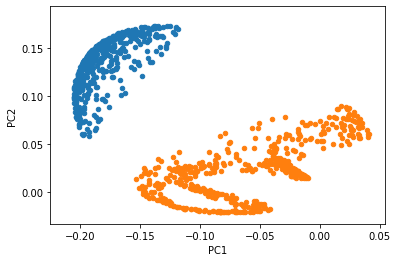

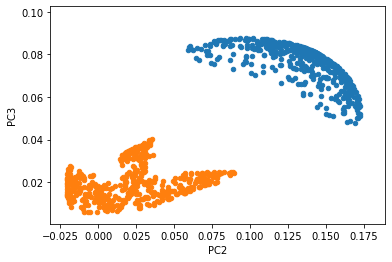

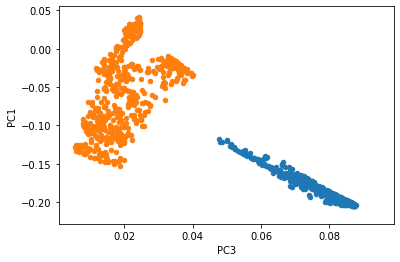

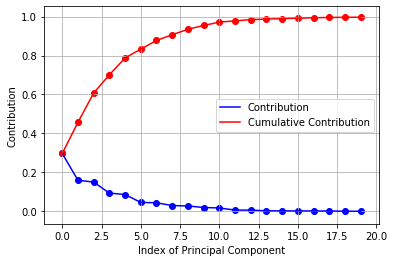

In [67]:
# データ作成
R1 = 2
R2 = 6
R_MARGIN = 3
C = (-4,2)
N = 1000
r1 = R1*np.random.rand(N//2)
r2 = (R2-R1-R_MARGIN)*np.random.rand(N//2) + R1 + R_MARGIN
theta1 = np.random.rand(N//2) * 2 * np.pi
theta2 = np.random.rand(N//2) * 2 * np.pi
data1 = np.array([r1 * np.sin(theta1) + C[0], r1 * np.cos(theta1) + C[1]]).T
data2 = np.array([r2 * np.sin(theta2) + C[0], r2 * np.cos(theta2) + C[1]]).T
data = np.concatenate([data1, data2])
labels = np.array([1 if i < N//2 else -1 for i in range(N)])
# 標準化
data = (data - np.average(data, axis=0)) / np.std(data, axis=0)

# 変換前のデータを描画
plt.scatter(data[:N//2, 0], data[:N//2, 1], s=20)
plt.scatter(data[N//2:, 0], data[N//2:, 1], s=20)
plt.show()

# 主成分分析を実行
pca = KernelPCA()
pca.fit(data)
data_new = pca.transform(data, 3)

# 変換後のデータを描画
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(data_new[:N//2, 0], data_new[:N//2, 1], s=20)
plt.scatter(data_new[N//2:, 0], data_new[N//2:, 1], s=20)
plt.show()
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.scatter(data_new[:N//2, 1], data_new[:N//2, 2], s=20)
plt.scatter(data_new[N//2:, 1], data_new[N//2:, 2], s=20)
plt.show()
plt.xlabel('PC3')
plt.ylabel('PC1')
plt.scatter(data_new[:N//2, 2], data_new[:N//2, 0], s=20)
plt.scatter(data_new[N//2:, 2], data_new[N//2:, 0], s=20)
plt.show()

# 各主成分ごとの寄与率 / 累積寄与率を描画
num_plot = 20
cumulative_cont = [pca.contribution[0]]
for c in pca.contribution[1:]:
    cumulative_cont.append(cumulative_cont[-1]+c)
plt.xlabel('Index of Principal Component')
plt.ylabel('Contribution')
plt.scatter(range(num_plot), pca.contribution[:num_plot], c='b')
plt.plot(range(num_plot), pca.contribution[:num_plot], c='b', label='Contribution')
plt.scatter(range(num_plot), cumulative_cont[:num_plot], c='r')
plt.plot(range(num_plot), cumulative_cont[:num_plot], c='r', label='Cumulative Contribution')
plt.grid()
plt.legend()
plt.show()